In [14]:
# Değiştirilebilir parametreler
match_puani= 1
mismatch_cezasi= -2
bosluk_cezasi= -5

# Fonksiyon
def constructEmptyMatrix(cols, rows):
    M = []
    for sutundizin in range(cols):
        M.append([])
    for sutundizin in range(cols):
        for rowdizin in range(rows):
            M[sutundizin].append(None)
    return M

def maxpuanihesapla(eslesme, yukari_skor, sol_skor, capraz_skor , match_puani, mismatch_cezasi, bosluk_cezasi):
    maxskor = -99
    yol = None 
  
    if (eslesme):
        eslesme_sonuc = capraz_skor+match_puani 
        if eslesme_sonuc>maxskor:
            maxskor = eslesme_sonuc
            yol = 'match'
    else:
        miseslesme_sonuc = capraz_skor+mismatch_cezasi
        if miseslesme_sonuc>maxskor:
            maxskor = miseslesme_sonuc
            yol = 'mismatch'
            
    yukaribosluk_sonuc = yukari_skor+bosluk_cezasi
    if yukaribosluk_sonuc>maxskor:
        maxskor = yukaribosluk_sonuc
        yol = 'vertical'
    solbosluk_sonuc = sol_skor+bosluk_cezasi
    if solbosluk_sonuc>maxskor:
        maxskor = solbosluk_sonuc
        yol = 'horizontal'
    
    # Smith-Waterman Algoritması
    maxskor = 0 if  maxskor < 0 else maxskor
    return maxskor, yol


def extractyol(yol, matrix):
    extractedyol = []
    basla = {
        'x': '', 
        'y': '', 
        'value': 0
         }
    # Baslamak için max değere sahip hücre koordinatı bulunur   
    for x in range(len(matrix)):
        for y in range(len(matrix[0])):
            if matrix[x][y] > basla ['value']:
                basla ['value'] = matrix[x][y]
                basla ['x'] = x
                basla ['y'] = y

    basladizin = 0
    
    for dizin in range(0, len(yol)):
        if yol[dizin]['current'] == [basla ['x'],basla ['y']]:
            basladizin = dizin
              
    simdikihucre = yol[basladizin]['current']
    sonrakihucre = yol[basladizin]['previous']
    extractedyol.append(simdikihucre)
    for dizin in range(0, len(yol)):
        # 0 hücre puanına ulaşıldığında durdurma koşulu
        if matrix[simdikihucre[0]][simdikihucre[1]] == 0:
            break 
        if sonrakihucre == yol[dizin]['current']:
            simdikihucre = yol[dizin]['current']
            sonrakihucre = yol[dizin]['previous']
            extractedyol.append(simdikihucre) 
    return extractedyol      


def fillMatrix(M, seq1, seq2,match_puani, mismatch_cezasi, bosluk_cezasi):
    cozumyol = []
    for x in range(len(seq1)):
        for y in range(len(seq2)):

            
            eslesme = True if seq1[x]==seq2[y] else False
            
            yukari_skor, sol_skor, capraz_skor = -99,-99,-99
            if y-1>=0:
                yukari_skor = M[x][y-1] if M[x][y-1]!= None else -99
            if x-1>=0:
                sol_skor = M[x-1][y] if M[x-1][y]!= None else -99
            if x-1>=0 and y-1>=0:
                capraz_skor = M[x-1][y-1] if M[x-1][y-1]!= None else -99

                    
            score, yol = maxpuanihesapla(eslesme, yukari_skor, sol_skor, capraz_skor,
                                                match_puani, mismatch_cezasi, bosluk_cezasi)
            if x == 0 and y==0:
                score = 0
            M[x][y] = score
            
            step = {
                'current':[], 
                'previous':[]
            }
            step['current'] =  [x,y]
            if yol == 'vertical':
                step['previous']= [x,y-1]
            if yol == 'horizontal':
                step['previous']= [x-1,y]
            if yol == 'match' or yol == 'mismatch':
                step['previous']= [x-1,y-1]
            cozumyol.append(step) 
            
    return M, cozumyol

def extractOptimalAllignment(seq1, seq2, optimalcozumyol):
    optimal_seq1=[]
    optimal_seq2=[]
    
    dizin_seq1 = optimalcozumyol[0][0]
    dizin_seq2 = optimalcozumyol[0][1]
    
    for dizin in range(len(optimalcozumyol)):
        
        # Durdurma koşulu: Son noktaya ulaşıldı
        if dizin+1 not in range(len(optimalcozumyol)):
            break
        simdikihucre = optimalcozumyol[dizin]  
        previousCell = optimalcozumyol[dizin+1]

        # Dikey bosluk: x koordinatı
        if simdikihucre[0] == previousCell[0]:
            optimal_seq1.append('_')
            optimal_seq2.append(seq2[dizin_seq2])
            dizin_seq2 -=1

        # Yatay bosluk: y koordiantı
        elif simdikihucre[1] == previousCell[1]:
            optimal_seq1.append(seq1[dizin_seq1])
            optimal_seq2.append('_')            
            dizin_seq1 -=1
        else: 
            optimal_seq1.append(seq1[dizin_seq1])
            optimal_seq2.append(seq2[dizin_seq2])
            dizin_seq1 -=1
            dizin_seq2 -=1
            
    optimal_seq1.reverse()
    optimal_seq2.reverse()
    return optimal_seq1, optimal_seq2

In [15]:
seq1 = "ATATAGGTAATC"
seq2 = "ACATAGCTAA"

# Listelenecek Diziler
seq1_list = ['j']+(list(seq1))
seq2_list = ['i']+(list(seq2))

Matrix = constructEmptyMatrix(len(seq1_list), len(seq2_list))
resultMatrix, allPossiblePaths = fillMatrix(Matrix, seq1_list, seq2_list, match_puani, mismatch_cezasi, bosluk_cezasi)
reversedPossiblePaths = list(reversed(allPossiblePaths))
optimalSolutionPath = extractyol(reversedPossiblePaths, resultMatrix)
print("Optimal Yerel Dizi Hizalaması: ", optimalSolutionPath)

optimal_seq1, optimal_seq2 = extractOptimalAllignment(seq1_list, seq2_list, optimalSolutionPath)

print("")
print("Optimal Yerel Dizi Hizalaması: ")
print(optimal_seq1)
print(optimal_seq2)

Optimal Yerel Dizi Hizalaması:  [[10, 10], [9, 9], [8, 8], [7, 7], [6, 6], [5, 5], [4, 4], [3, 3], [2, 2]]

Optimal Yerel Dizi Hizalaması: 
['A', 'T', 'A', 'G', 'G', 'T', 'A', 'A']
['A', 'T', 'A', 'G', 'C', 'T', 'A', 'A']


sekans 1:  ATATAGGTAATC
sekans 2:  ACATAGCTAA

Smith-Waterman Algoritmasını kullanarak Optimal Yerel Dizi Hizalaması: 
A T A G G T A A
A T A G C T A A


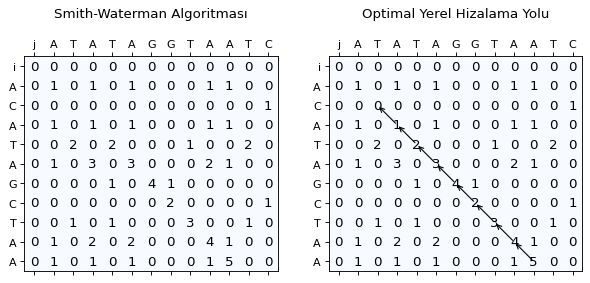

In [16]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize=(9,9), dpi= 80)

# Smith-Waterman Grafiği 
plotMatrix = [[0]*len(seq1_list)]*len(seq2_list)
ax[0].matshow(plotMatrix, cmap='Blues')
ax[0].set_title(f'Smith-Waterman Algoritması\n')
ax[0].set_xticks(range(len(seq1_list)))
ax[0].set_yticks(range(len(seq2_list)))
ax[0].set_yticklabels(seq2_list)
ax[0].set_xticklabels(seq1_list)
for i in range(len(seq2_list)):
    for j in range(len(seq1_list)):
        c = resultMatrix[j][i]
        ax[0].text(j, i, str(c), va='center', ha='center', fontsize= 'large')

# Optimal yerel hizalama yolunun oluşturulması   
ax[1].matshow(plotMatrix, cmap='Blues')
ax[1].set_title(f'Optimal Yerel Hizalama Yolu\n')
ax[1].set_xticks(range(len(seq1_list)))
ax[1].set_yticks(range(len(seq2_list)))
ax[1].set_yticklabels(seq2_list)
ax[1].set_xticklabels(seq1_list)
for i in range(len(seq2_list)):
    for j in range(len(seq1_list)):
        c = resultMatrix[j][i]
        ax[1].text(j, i, str(c), va='center', ha='center', fontsize= 'large')
for index in range(len(optimalSolutionPath)) :
    fromCell = optimalSolutionPath[index]
    toCell = optimalSolutionPath[index+1 if index+1 in range(len(optimalSolutionPath)) else index ]
    fromX, fromY, toX, toY = fromCell[0],fromCell[1], toCell[0], toCell[1] 
    ax[1].annotate("", xy=(toX, toY), xytext=(fromX,fromY),arrowprops=dict(arrowstyle="->"), color='grey')
      
print("sekans 1: ", seq1)
print("sekans 2: ", seq2)
print("")
print("Smith-Waterman Algoritmasını kullanarak Optimal Yerel Dizi Hizalaması: ")
print(*optimal_seq1)
print(*optimal_seq2)